In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import time

In [2]:
X_train = pickle.load(open("X_train.pickle", "rb"))
y_train = pickle.load(open("y_train.pickle", "rb"))
X_test = pickle.load(open("X_test.pickle", "rb"))
y_test = pickle.load(open("y_test.pickle", "rb"))

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2)

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [5]:
print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))
print(len(X_test))
print(len(y_test))

1944
1944
486
486
400
400


In [6]:
#X_train = X_train[:2000]
#y_train = y_train[:2000]
#X_test = X_test[:200]
#y_test = y_test[:200]

In [7]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

1944
1944
400
400


In [8]:
#reshape array to fit cnn
X_train = np.array(X_train).reshape(-1, 250, 250, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_val = np.array(X_train).reshape(-1, 250, 250, 1)
y_val = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 250, 250, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [9]:
#callback to stop cnn training when validation reaches 95 accuracy
ACCURACY_THRESHOLD = 0.95

class callback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') > ACCURACY_THRESHOLD):
            print("\nReached %2.2f%% accuracy, so stopping training!!" % (ACCURACY_THRESHOLD*100))
            self.model.stop_training = True


In [10]:
callbacks = callback()
#normalise data
X_train = X_train/255
X_val = X_val/255
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=X_train.shape[1:]))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 5
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 6
model.add(keras.layers.Conv2D(256,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Flatten layer
model.add(keras.layers.Flatten())

# Hidden Layer
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer 
model.add(keras.layers.Dense(1,activation='sigmoid'))

# binary cross-entropy is the loss fucntion with the adam optimizer
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
#records time
start = time.time()
#batch size at 80 and max epoch is 30
histroy = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size = 80, callbacks=[callbacks])
print("Total time:", time.time() - start, "seconds")


Epoch 1/30
25/25 [==============================] - 60s 2s/step - loss: 0.6740 - accuracy: 0.5592 - val_loss: 0.6332 - val_accuracy: 0.6147
Epoch 2/30
25/25 [==============================] - 58s 2s/step - loss: 0.5869 - accuracy: 0.7140 - val_loss: 0.5046 - val_accuracy: 0.7716
Epoch 3/30
25/25 [==============================] - 59s 2s/step - loss: 0.4981 - accuracy: 0.7629 - val_loss: 0.5041 - val_accuracy: 0.7927
Epoch 4/30
25/25 [==============================] - 58s 2s/step - loss: 0.4382 - accuracy: 0.8138 - val_loss: 0.3618 - val_accuracy: 0.8390
Epoch 5/30
25/25 [==============================] - 59s 2s/step - loss: 0.4851 - accuracy: 0.7948 - val_loss: 0.5436 - val_accuracy: 0.7747
Epoch 6/30
25/25 [==============================] - 58s 2s/step - loss: 0.4517 - accuracy: 0.8086 - val_loss: 0.3861 - val_accuracy: 0.8287
Epoch 7/30
25/25 [==============================] - 57s 2s/step - loss: 0.3734 - accuracy: 0.8395 - val_loss: 0.3107 - val_accuracy: 0.8678
Epoch 8/30
25/25 [==

In [11]:
#model summary 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 64)       0

In [12]:
#save model
model.save('final-16epochs-32-64-64-128-128-256-COVID-XRay')

INFO:tensorflow:Assets written to: final-16epochs-32-64-64-128-128-256-COVID-XRay\assets


In [13]:
#uses the model to predict test patient data
results = []
for i in range(len(y_test)):
    X_pred = X_test[i]
    X_pred = X_pred.reshape(-1, 250, 250, 1)
    prediction = model.predict([X_pred])
    results.append(prediction)

In [14]:
#convert cnn ouput to binary
X_result = []
for i in range(len(y_test)):
    X = results[i][0][0]
    if X > 0.5:
        X = 1
    else:
        X = 0
    X_result.append(X)
    

In [28]:
#get percentage of correct predictions
count = 0
for i in range(len(X_result)):
    if X_result[i] == y_test[i]:
        count = count+1
    else:
        pass
print("precentage of currenct diagnosis is {}%".format((count/len(X_result)*100)))

precentage of currenct diagnosis is 76.5%


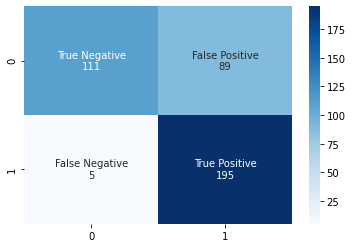

In [21]:
#confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt    
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, X_result)

ax= plt.subplot()

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt='', ax=ax, cmap='Blues');  #annot=True to annotate cells, ftm='g' to disable scientific notation

In [16]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import time

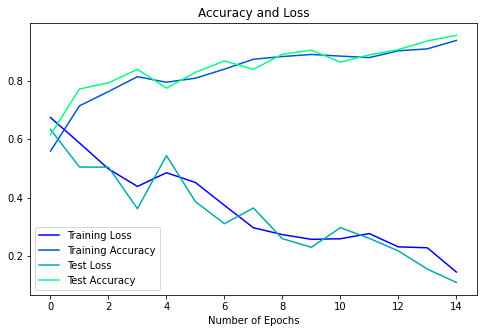

In [17]:
#loss and accuracy graph
mylabels = ['Training Loss', 'Training Accuracy', 'Test Loss', 'Test Accuracy']
pd.DataFrame(histroy.history).plot(figsize=(8,5), cmap='winter')
plt.xlabel('Number of Epochs')

plt.title('Accuracy and Loss')
plt.legend(labels=mylabels)
plt.show()